## 다중분류 - 아이리스 품종 분류

In [1]:
import numpy as np
import tensorflow as tf
seed = 2022
np.random.seed(seed)
tf.random.set_seed(seed)
import pandas as pd

- 데이터 전처리

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()

In [3]:
# X data는 정규화
from sklearn.preprocessing import StandardScaler
X_scaled = StandardScaler().fit_transform(iris.data)
X_scaled.shape

(150, 4)

In [4]:
# Y data는 one- hot encoding
from tensorflow.keras.utils import to_categorical
Y_onehot = to_categorical(iris.target) # y를 대문자로 쓰는 이유는 2차원
Y_onehot[:5]

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]], dtype=float32)

In [5]:
Y_onehot.shape


(150, 3)

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, Y_onehot, stratify = Y_onehot, test_size = 0.2, random_state = seed
)

In [9]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((120, 4), (30, 4), (120, 3), (30, 3))

- 모델 정의/설정/학습/평가

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [11]:
model = Sequential([
    Dense(16, input_dim=4, activation= 'relu'),  # Hiddem Layer
    Dense(3, activation= 'softmax')              # Output Layer
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                80        
                                                                 
 dense_1 (Dense)             (None, 3)                 51        
                                                                 
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________


- 실행 환경 설정(compile)

In [13]:
model.compile(
    optimizer= 'adam',
    loss = 'categorical_crossentropy',         # 다중분류시 오차 함수
    metrics=['accuracy']                       

)

In [14]:
history = model.fit(
    X_train,  y_train, validation_split = 0.2, epochs =200, batch_size = 50, verbose =0
)

In [16]:
model.evaluate(X_test, y_test)


1/1 [==============================] - 0s 18ms/step - loss: 0.2548 - accuracy: 0.9333


[0.2547621428966522, 0.9333333373069763]

- 모델 저장/로드

In [24]:
!mkdir model

mkdir: cannot create directory ‘model’: File exists


In [25]:
model.save('model/iris.h5')

- 복구

In [26]:
from tensorflow.keras.models import load_model
my_model = load_model('model/iris.h5')

In [27]:
my_model.evaluate(X_test,y_test)

1/1 [==============================] - 0s 119ms/step - loss: 0.2548 - accuracy: 0.9333


[0.2547621428966522, 0.9333333373069763]

- 아이리스는 세토사 데이터가 많으면 맞는거고 , 버지니카 같은 데이터가 많으면 틀린거라고 운빨적이다.
- 정형화 data = 이미지, 텍스트 데이터 

- 학습과정 시각화

In [29]:
import matplotlib.pyplot as plt

In [30]:
y_acc = history.history['accuracy']
y_vloss = history.history['val_loss']
xs = np.arange(1,len(y_acc)+1)


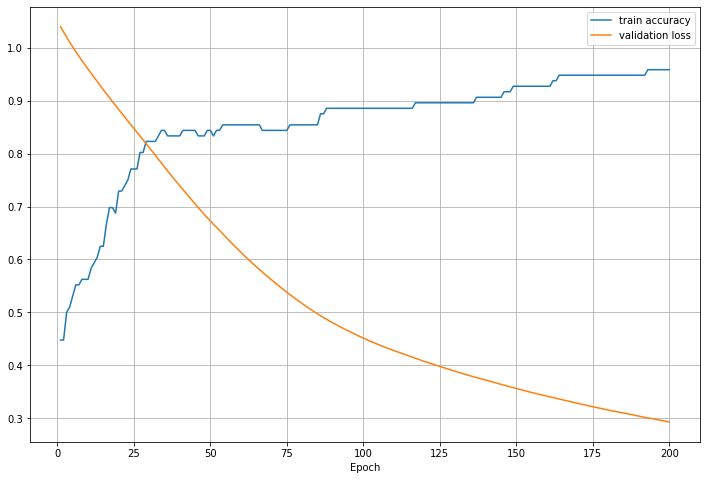

In [31]:
plt.figure(figsize=(12,8))
plt.plot(xs, y_acc, ms =5, label = 'train accuracy')
plt.plot(xs, y_vloss, ms = 5, label = 'validation loss')
plt.legend()
plt.grid()
plt.xlabel('Epoch')
plt.show()

- Epoch 횟수를 더 늘려서 학습을 해보자

In [43]:
model2 = Sequential([
    Dense(16, input_dim=4, activation= 'relu'),  # Hiddem Layer
    Dense(3, activation= 'softmax')              # Output Layer
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                80        
                                                                 
 dense_1 (Dense)             (None, 3)                 51        
                                                                 
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________


In [44]:
model2.compile(
    optimizer= 'adam',
    loss = 'categorical_crossentropy',         # 다중분류시 오차 함수
    metrics=['accuracy']                       

)

In [45]:
history2 = model2.fit(
    X_train,  y_train, validation_split = 0.2, epochs =1000, batch_size = 50, verbose =0
)

In [46]:
model2.evaluate(X_test,y_test)

1/1 [==============================] - 0s 18ms/step - loss: 0.1334 - accuracy: 0.9000


[0.13342145085334778, 0.8999999761581421]

In [47]:
y_acc = history2.history['accuracy']
y_vloss = history2.history['val_loss']
xs = np.arange(1,len(y_acc)+1)


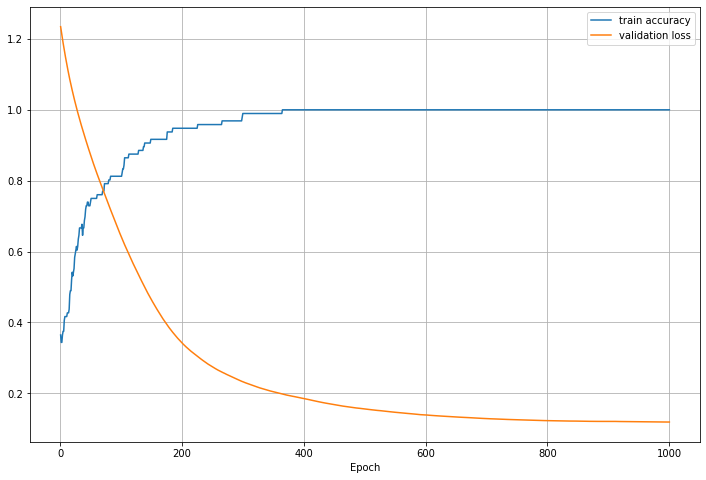

In [48]:
plt.figure(figsize=(12,8))
plt.plot(xs, y_acc, ms =5, label = 'train accuracy')
plt.plot(xs, y_vloss, ms = 5, label = 'validation loss')
plt.legend()
plt.grid()
plt.xlabel('Epoch')
plt.show()

-  370 epoch 넘어가면서 부턴 100프로 되면서 과적합된 상태, 위에 그래프는 100프로가 되지 않았다.

- 정형화된 데이터는 신경망 보다는 앙상블(XGBoost)가 잘한다.